In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

In [9]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Predict S, I, R given S0, I0, R0, beta, gamma
def SIR_predict(y0, t, beta, gamma):
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    return S, I, R

# Used to find I0, beta, gamma via curve_fit
def SIR(t, I0, beta, gamma):
    S0 = N - I0 - R0
    y0 = np.array([S0, I0, R0])
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    return I

# Used to find beta, gamma via curve_fit
def SIR_dopo(t, beta, gamma):
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    return I

In [10]:
def R_0(beta, gamma):
    return beta / gamma

In [33]:
def fit(tmin, tmax, y0):
    print('Start: ', xdata[tmin])
    print('End: ', xdata[tmax])
    t = np.arange(tmin, tmax)
    popt, _ = curve_fit(SIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 1.]))
    R_0_list.append(R_0(popt[0], popt[1]))
    print('Rt = ', R_0(popt[0], popt[1]))
    s, i, r = SIR_predict(y0, t, popt[0], popt[1])
    i_list.append(i)
    return s, i, r

In [34]:
df_covid = pd.read_csv('data/dpc-covid19-ita-regioni.csv', parse_dates = ['data'])
df_covid = df_covid[df_covid['denominazione_regione'] == 'Lombardia']
df_covid = df_covid[df_covid['data'] < '2020-12-29']
df_covid['data'] = pd.to_datetime(df_covid['data']).dt.date
df_covid = df_covid.drop(columns = ['casi_da_sospetto_diagnostico', 'casi_da_screening', 'tamponi', 'casi_testati', 'note', 'ingressi_terapia_intensiva', 
                                   'note_test', 'note_casi', 'totale_positivi_test_molecolare', 'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
                                   'tamponi_test_antigenico_rapido', 'ricoverati_con_sintomi', 'terapia_intensiva', 'stato', 'isolamento_domiciliare',
                                   'totale_ospedalizzati', 'codice_regione', 'denominazione_regione', 'lat', 'long', 'codice_nuts_1' , 'codice_nuts_2'])

df_covid['recovered_death'] = df_covid['dimessi_guariti'] + df_covid['deceduti']
df_covid = df_covid.reset_index()
df_covid.head(10)

,index,data,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,recovered_death
0,8,2020-02-24,166,0,166,0,6,172,6
1,29,2020-02-25,231,65,68,0,9,240,9
2,50,2020-02-26,249,18,18,0,9,258,9
3,71,2020-02-27,349,100,145,40,14,403,54
4,92,2020-02-28,474,125,128,40,17,531,57
5,113,2020-02-29,552,78,84,40,23,615,63
6,134,2020-03-01,887,335,369,73,24,984,97
7,155,2020-03-02,1077,190,270,139,38,1254,177
8,176,2020-03-03,1326,249,266,139,55,1520,194
9,197,2020-03-04,1497,171,300,250,73,1820,323


In [35]:
xdata = df_covid['data']
I = df_covid['totale_positivi']
R = df_covid['recovered_death']
N = 10000000

In [55]:
t_list = [[0,21], [21, 35], [35, 80], [80, 100], [100, 130], [130, 179], [179, 225], [225, 260],
        [260, 290], [290,300]]

# t_list = [[0,21], [21, 87], [87, 118], [118, 179], [179, 225], [225, 242], [242, 258], [258, 290],
#          [290, 300]]

In [56]:
R_0_list = []
i_list = []
s, i, r = np.array([0]), np.array([0]), np.array([0])

In [57]:
for t in t_list:
    tmin, tmax =t[0], t[1] 
    I0, R0 = I[tmin], R[tmin]
    S0 = N - I0 - R0
    y0 = S0, I0, R0
    s, i, r = fit(tmin,tmax, y0)

Start:  2020-02-24
End:  2020-03-16
Rt =  1.213002187078937
Start:  2020-03-16
End:  2020-03-30
Rt =  1.0812454932510733
Start:  2020-03-30
End:  2020-05-14
Rt =  1.0510782890694337
Start:  2020-05-14
End:  2020-06-03
Rt =  0.9596607419315255
Start:  2020-06-03
End:  2020-07-03
Rt =  0.9883837966972472
Start:  2020-07-03
End:  2020-08-21
Rt =  0.0014105213973189612
Start:  2020-08-21
End:  2020-10-06
Rt =  1.0385452980461403
Start:  2020-10-06
End:  2020-11-10
Rt =  1.2634830928177996
Start:  2020-11-10
End:  2020-12-10
Rt =  1.0953868975097192
Start:  2020-12-10
End:  2020-12-20
Rt =  1.0219361151343245


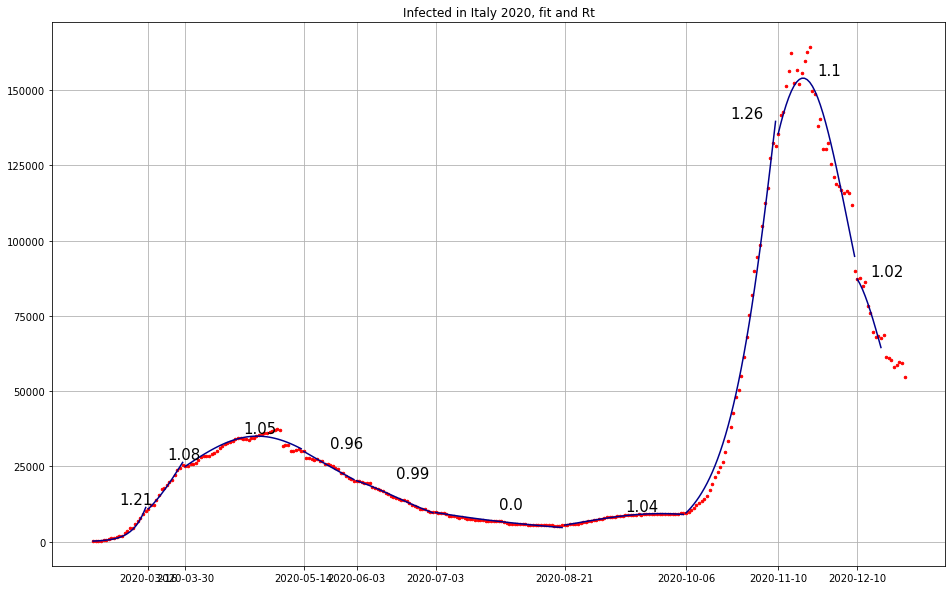

In [45]:
plt.figure(figsize=(16, 10))
plt.plot(xdata, I, 'r.', markersize=5)
def plot_bello(lista):
    for i in range(len(lista)):
        idx_0 = lista[i][0]
        idx_1 = lista[i][1]
        plt.text(xdata[int((idx_1 + idx_0)/2)], np.max(i_list[i]) + 1000, str(round(R_0_list[i],2)), fontsize = 15)
        plt.plot(xdata[idx_0:idx_1], i_list[i], 'darkblue', label = 'SIR model')
plot_bello(t_list)
plt.title('Infected in Italy 2020, fit and Rt')
plt.xticks([xdata[21], xdata[35],xdata[80],xdata[100], xdata[130], xdata[179],xdata[225],xdata[260],xdata[290]], fontsize=10) 
plt.yticks(fontsize=10)
plt.grid()
plt.show()

# First phase 24-02 until 13-03

In [28]:
tmin = 0
tmax = 21
R0 = 0
I0 = I[0]
t = np.arange(tmin, tmax)

In [29]:
p0 = [200, 0.2, 1./10]
popt, _ = curve_fit(SIR, t, np.array(I[tmin:tmax]), bounds = (0., [1000, 3, 1]))

In [30]:
print('beta = ', popt[1])
print('gamma = ', popt[2])
print('R0 = ', popt[1]/popt[2])
print('I0 inital infected = ', int(popt[0]))

beta =  1.067629521300019
gamma =  0.8957990377675891
R0 =  1.1918181157691874
I0 inital infected =  353


In [31]:
I0, R0 = int(popt[0]), 0
S0 = N - I0 - R0
y0 = S0, I0, R0
s, i, r = SIR_predict(y0, t, popt[1], popt[2])

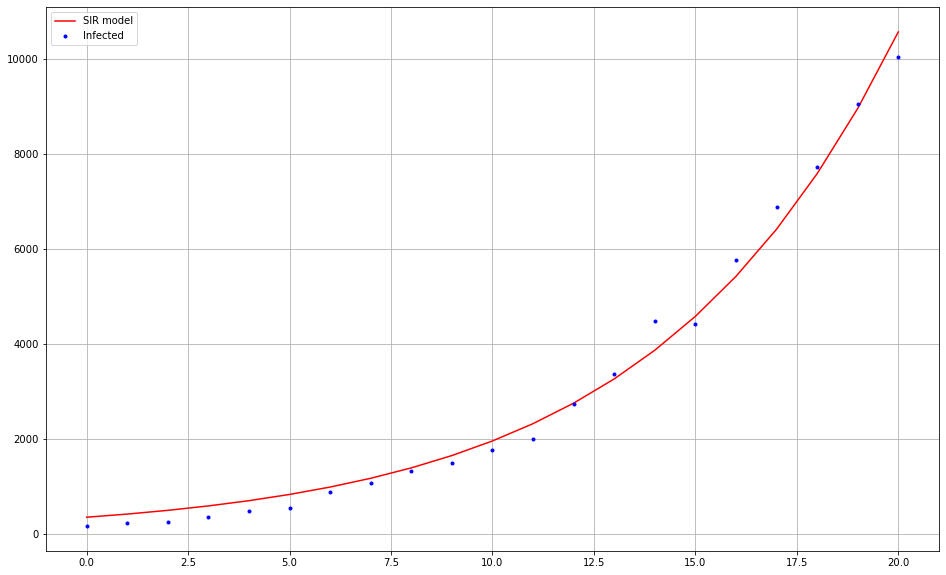

In [32]:
plt.figure(figsize=(16, 10))
y1 = SIR(t, int(popt[0]), popt[1], popt[2])
plt.plot(t, SIR(t, int(popt[0]), popt[1], popt[2]), 'r', label = 'SIR model')
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

# First lockdown first phase 13-03 until 30-03

In [12]:
tmin = 18
tmax = 35
R0 = int(R[tmin])
I0 = int(I[tmin])
S0 = N - I0 - R0
y0 = S0, I0, R0
t = np.arange(tmin, tmax)

In [13]:
p0 = [0.2,0.2]
popt, _ = curve_fit(SIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 1]))
s, i, r = SIR_predict(y0, t, popt[0], popt[1])

In [14]:
print('beta = ', popt[0])
print('gamma = ', popt[1])
print('R0 = ', popt[0]/popt[1])

beta =  1.1114897999423736
gamma =  0.9999999999999998
R0 =  1.1114897999423738


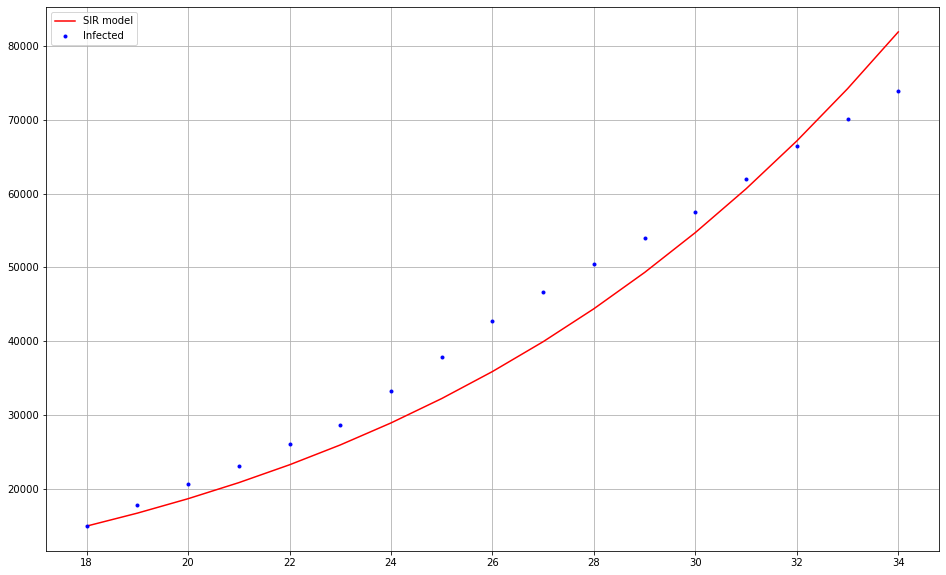

In [15]:
plt.figure(figsize=(16, 10))
y2 =  SIR_dopo(t, popt[0], popt[1])
plt.plot(t, SIR_dopo(t, popt[0], popt[1]), 'r', label = 'SIR model')
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

# First lockdown second phase 30-03 until 14-05

In [16]:
tmin = 35
tmax = 80
R0 = int(R[tmin])
I0 = int(I[tmin])
S0 = N - I0 - R0
y0 = S0, I0, R0
t = np.arange(tmin, tmax)

In [17]:
p0 = [0.2,0.2]
popt, _ = curve_fit(SIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 1]))
s, i, r = SIR_predict(y0, t, popt[0], popt[1])

In [18]:
print('beta = ', popt[0])
print('gamma = ', popt[1])
print('R0 = ', popt[0]/popt[1])

beta =  0.9255123111686352
gamma =  0.8931147825630321
R0 =  1.0362747647201962


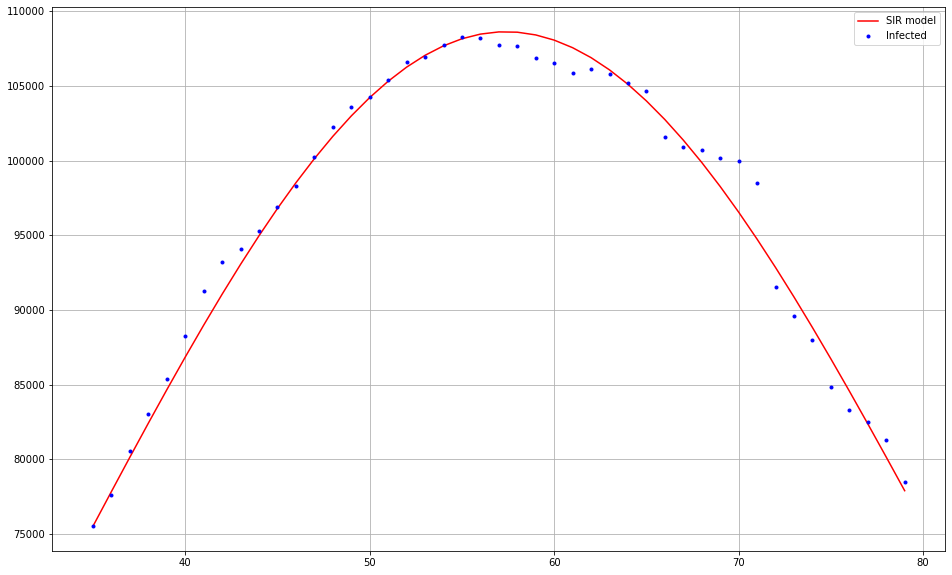

In [19]:
plt.figure(figsize=(16, 10))
y3 = SIR_dopo(t, popt[0], popt[1])
plt.plot(t, SIR_dopo(t, popt[0], popt[1]), 'r', label = 'SIR model')
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

# End lockdown 14-05 until 03-06

In [20]:
tmin = 80
tmax = 100
R0 = int(R[tmin])
I0 = int(I[tmin])
S0 = N - I0 - R0
y0 = S0, I0, R0
t = np.arange(tmin, tmax)

In [21]:
p0 = [0.2,0.2]
popt, _ = curve_fit(SIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 1]))
s, i, r = SIR_predict(y0, t, popt[0], popt[1])

In [22]:
print('beta = ', popt[0])
print('gamma = ', popt[1])
print('R0 = ', popt[0]/popt[1])

beta =  0.6205578877619299
gamma =  0.6482574898899571
R0 =  0.9572706793827722


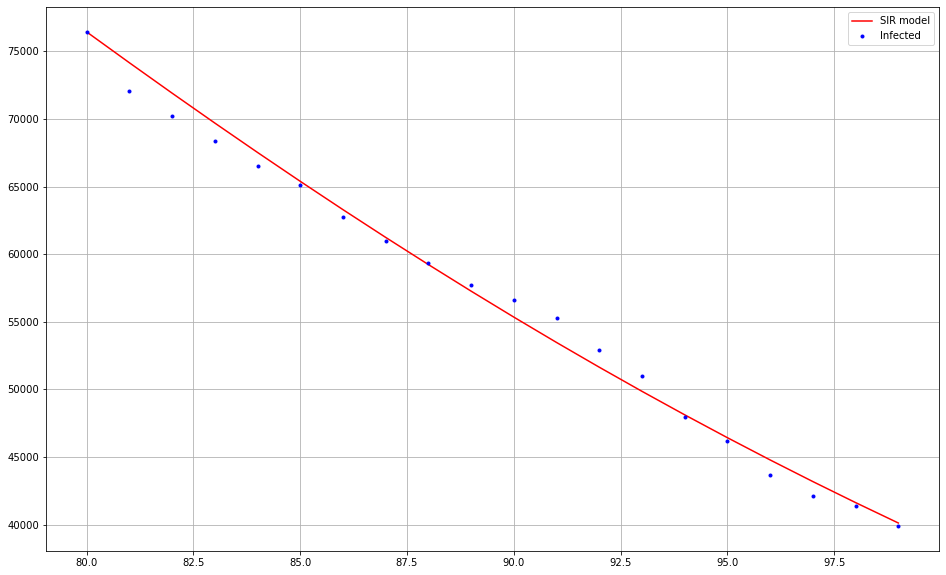

In [23]:
plt.figure(figsize=(16, 10))
y4 = SIR_dopo(t, popt[0], popt[1])
plt.plot(t, SIR_dopo(t, popt[0], popt[1]), 'r', label = 'SIR model')
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

# Summer 03-06 until 03-07

In [577]:
tmin = 100
tmax = 130
R0 = int(R[tmin])
I0 = int(I[tmin])
S0 = N - I0 - R0
y0 = S0, I0, R0
t = np.arange(tmin, tmax)

In [578]:
p0 = [0.2,0.2]
popt, _ = curve_fit(SIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 1]))
s, i, r = SIR_predict(y0, t, popt[0], popt[1])

In [579]:
print('beta = ', popt[0])
print('gamma = ', popt[1])
print('R0 = ', popt[0]/popt[1])

beta =  0.4646571066955443
gamma =  0.4962024378454432
R0 =  0.9364264889812479


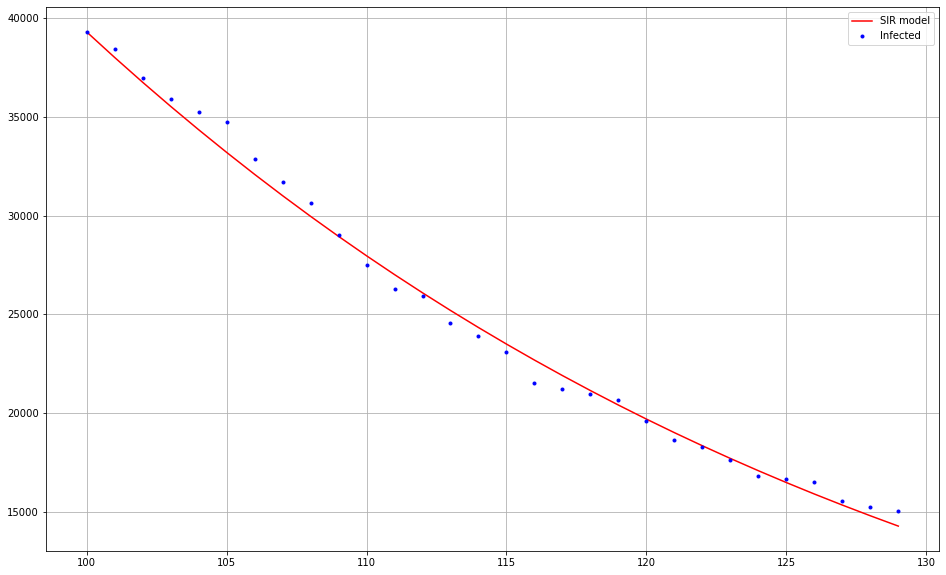

In [580]:
plt.figure(figsize=(16, 10))
y5 =  SIR_dopo(t, popt[0], popt[1])
plt.plot(t, SIR_dopo(t, popt[0], popt[1]), 'r', label = 'SIR model')
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

# Summer 03-07 until 23-07

In [581]:
tmin = 130
tmax = 150
R0 = int(R[tmin])
I0 = int(I[tmin])
S0 = N - I0 - R0
y0 = S0, I0, R0
t = np.arange(tmin, tmax)

In [582]:
p0 = [0.2,0.2]
popt, _ = curve_fit(SIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 1]))
s, i, r = SIR_predict(y0, t, popt[0], popt[1])

In [583]:
print('beta = ', popt[0])
print('gamma = ', popt[1])
print('R0 = ', popt[0]/popt[1])

beta =  3.368901776834883e-05
gamma =  0.012103237665414384
R0 =  0.002783471555269621


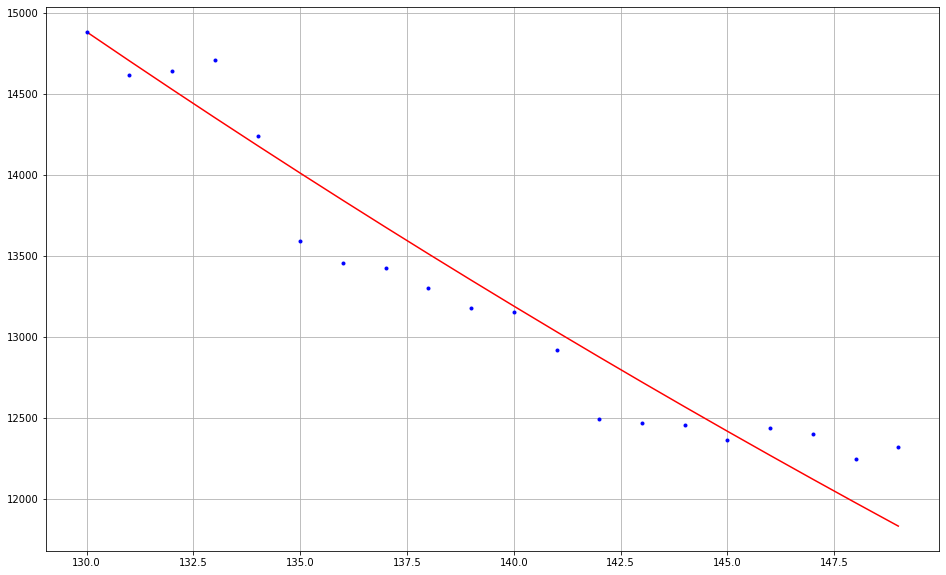

In [584]:
plt.figure(figsize=(16, 10))
y6 = SIR_dopo(t, popt[0], popt[1])
plt.plot(t, SIR_dopo(t, popt[0], popt[1]), 'r', label = 'SIR model')
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

# End summer 12-08 until 01-10

In [585]:
tmin = 170
tmax = 220
R0 = int(R[tmin])
I0 = int(I[tmin])
S0 = N - I0 - R0
y0 = S0, I0, R0
t = np.arange(tmin, tmax)

In [586]:
p0 = [0.2,0.2]
popt, _ = curve_fit(SIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 1]))
s, i, r = SIR_predict(y0, t, popt[0], popt[1])

In [587]:
print('beta = ', popt[0])
print('gamma = ', popt[1])
print('R0 = ', popt[0]/popt[1])

beta =  0.9662502556983364
gamma =  0.9255957514019748
R0 =  1.043922526907436


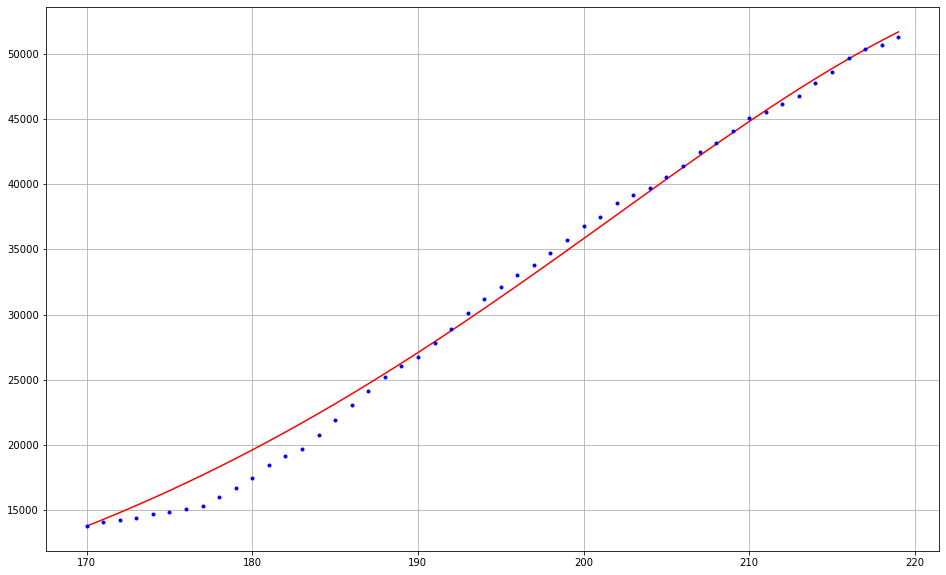

In [588]:
plt.figure(figsize=(16, 10))
y7 = SIR_dopo(t, popt[0], popt[1])
plt.plot(t, SIR_dopo(t, popt[0], popt[1]), 'r', label = 'SIR model')
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

# Autumn 01-10 until 20-11

In [590]:
tmin = 220
tmax = 270
R0 = int(R[tmin])
I0 = int(I[tmin])
S0 = N - I0 - R0
y0 = S0, I0, R0
t = np.arange(tmin, tmax)

In [591]:
p0 = [0.9,0.8]
popt, _ = curve_fit(SIR_dopo, t, np.array(I[tmin:tmax]), p0, bounds = (0, [3., 1]))
s, i, r = SIR_predict(y0, t, popt[0], popt[1])

In [592]:
print('beta = ', popt[0])
print('gamma = ', popt[1])
print('R0 = ', popt[0]/popt[1])

beta =  0.3978068424452857
gamma =  0.32803041678976624
R0 =  1.2127132792695836


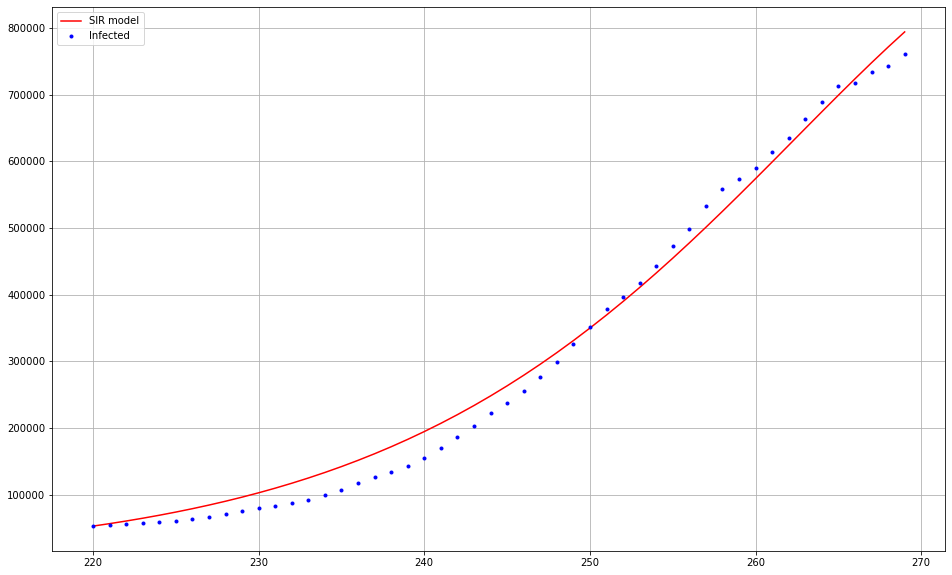

In [593]:
plt.figure(figsize=(16, 10))
y8 = SIR_dopo(t, popt[0], popt[1])
plt.plot(t, SIR_dopo(t, popt[0], popt[1]), 'r', label = 'SIR model')
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()

# Winter 10-11 until 20-12

In [594]:
tmin = 260
tmax = 300
R0 = int(R[tmin])
I0 = int(I[tmin])
S0 = N - I0 - R0
y0 = S0, I0, R0
t = np.arange(tmin, tmax)

In [595]:
p0 = [0.9,0.8]
popt, _ = curve_fit(SIR_dopo, t, np.array(I[tmin:tmax]), p0, bounds = (0, [3., 1]))
s, i, r = SIR_predict(y0, t, popt[0], popt[1])

In [596]:
print('beta = ', popt[0])
print('gamma = ', popt[1])
print('R0 = ', popt[0]/popt[1])

beta =  0.3767518877278482
gamma =  0.33933603808941076
R0 =  1.1102619393127318


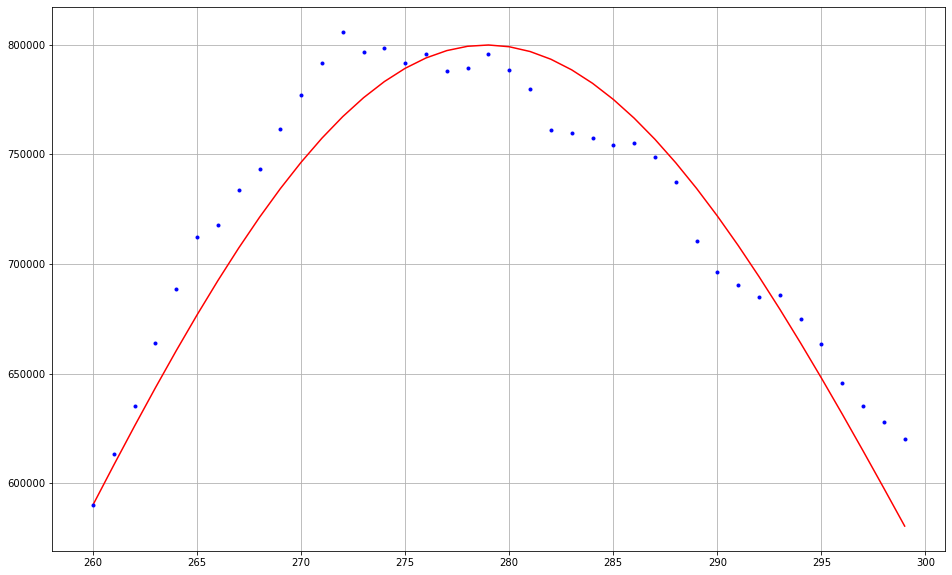

In [597]:
plt.figure(figsize=(16, 10))
y9 = SIR_dopo(t, popt[0], popt[1])
plt.plot(t, SIR_dopo(t, popt[0], popt[1]), 'r', label = 'SIR model')
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()

# End year 20-11 until 28-12 

In [598]:
tmin = 270
tmax = len(xdata)
R0 = int(R[tmin])
I0 = int(I[tmin])
S0 = N - I0 - R0
y0 = S0, I0, R0
t = np.arange(tmin, tmax)

In [599]:
p0 = [0.07,0.6]
popt, _ = curve_fit(SIR_dopo, t, np.array(I[tmin:tmax]),bounds = (0, [1., 1]))
s, i, r = SIR_predict(y0, t, popt[0], popt[1])

In [600]:
print('beta = ', popt[0])
print('gamma = ', popt[1])
print('R0 = ', popt[0]/popt[1])

beta =  0.22937015596607097
gamma =  0.22162961061033812
R0 =  1.034925592001973


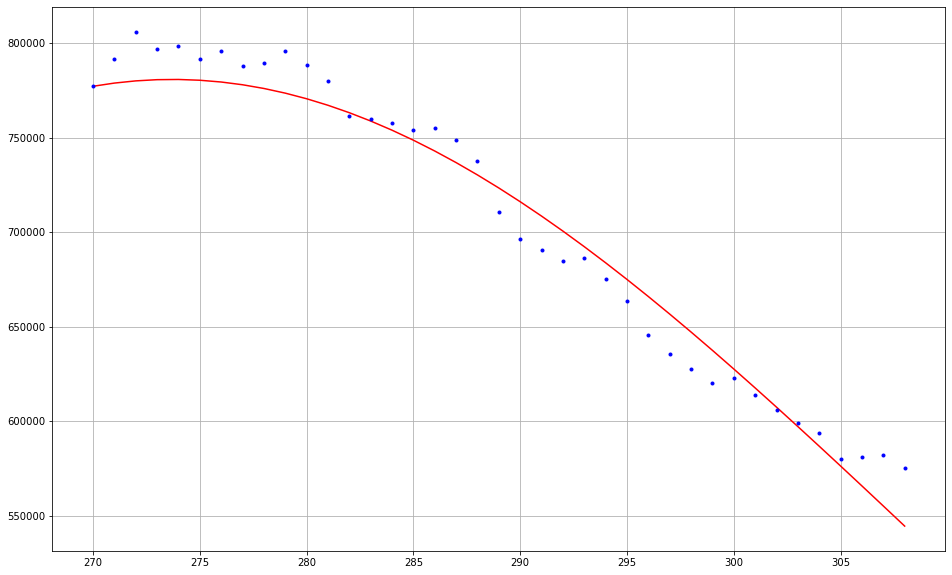

In [601]:
plt.figure(figsize=(16, 10))
y10 = SIR_dopo(t, popt[0], popt[1])
plt.plot(t, SIR_dopo(t, popt[0], popt[1]), 'r', label = 'SIR model')
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()